# Analysis of Townhall(Biden and Trump):2020

## Import Packages

In [1]:
import numpy as np
import pandas as pd

# For vissual
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from wordcloud import WordCloud, ImageColorGenerator

import nltk
from nltk.corpus import stopwords
from nltk import bigrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from collections import Counter
import datetime

## Read Data

In [2]:
df_Biden = pd.read_csv('Data_files/2020_biden_town_hall.csv')
df_Trump = pd.read_csv('Data_files/2020_trump_town_hall.csv')
df_Biden.head()

speaker    minute  \
0  George Stephanopoulos  00:00:41   
1              Joe Biden  00:00:46   
2  George Stephanopoulos  00:00:47   
3              Joe Biden  00:01:02   
4  George Stephanopoulos  00:01:02   

                                                text  
0  Hey, and welcome to our town hall with Joe Bid...  
1                              Good to be with you.   
2  We are here with a group of Pennsylvania voter...  
3                                              Okay.  
4  And we're going to start with Nicholas Fed, an...

In [3]:
df_Trump.head()

speaker    minute  \
0  Savannah Guthrie  00:03:50   
1         Speaker 1  00:04:35   
2  Savannah Guthrie  00:04:40   
3      Donald Trump  00:04:48   
4  Savannah Guthrie  00:04:51   

                                                text  
0  It's nothing but noise. What? Okay. All right,...  
1  This is an NBC news special presentation of To...  
2  Tonight, Donald Trump in the arena. His first ...  
3  I'm feeling great, I don't know about you. How...  
4  With tonight's debate canceled, the President ...

In [4]:
print(df_Biden.shape)
print(df_Trump.shape)

(222, 3)
(403, 3)


## Data Processing - Convert to String

In [5]:
df_GS = df_Biden[df_Biden.speaker=='George Stephanopoulos']
df_GS.index = np.arange(0,len(df_GS))

df_JB = df_Biden[df_Biden.speaker=='Joe Biden']
df_JB.index = np.arange(0,len(df_JB))

df_SG = df_Trump[df_Trump.speaker=='Savannah Guthrie']
df_SG.index = np.arange(0,len(df_SG))

df_DT = df_Trump[df_Trump.speaker=='Donald Trump']
df_DT.index = np.arange(0,len(df_DT))

In [6]:
df_JB

speaker    minute                                               text
0    Joe Biden  00:00:46                              Good to be with you. 
1    Joe Biden  00:01:02                                              Okay.
2    Joe Biden  00:01:08                                    I know it well.
3    Joe Biden  00:01:55  Well, first of all, going back, the fact is th...
4    Joe Biden  00:02:16  I suggested that we should be seeking, and I d...
..         ...       ...                                                ...
120  Joe Biden  01:24:26  Every single solitary generation, the dial has...
121  Joe Biden  01:25:10                We'd better be able to do it again.
122  Joe Biden  01:25:16  Well, it could say I'm a lousy candidate, and ...
123  Joe Biden  01:30:49  Yeah. And by the way, before I came up here, I...
124  Joe Biden  01:32:01                              I expect to be there.

[125 rows x 3 columns]

In [7]:
df_GS

speaker    minute  \
0   George Stephanopoulos  00:00:41   
1   George Stephanopoulos  00:00:47   
2   George Stephanopoulos  00:01:02   
3   George Stephanopoulos  00:01:09   
4   George Stephanopoulos  00:03:31   
..                    ...       ...   
56  George Stephanopoulos  01:22:07   
57  George Stephanopoulos  01:25:11   
58  George Stephanopoulos  01:26:28   
59  George Stephanopoulos  01:32:00   
60  George Stephanopoulos  01:32:02   

                                                 text  
0   Hey, and welcome to our town hall with Joe Bid...  
1   We are here with a group of Pennsylvania voter...  
2   And we're going to start with Nicholas Fed, an...  
3                                  You're a Democrat.  
4   Before you go to the future, can I follow up o...  
..                                                ...  
56  And welcome back to our town hall with former ...  
57  Mr. Vice President, if you lose, what will tha...  
58  One more break. We'll be right back. And we ar...  
59                        But you expect to be there?  
60  Mr. Vice President, thank you for your time to...  

[61 rows x 3 columns]

In [8]:
df_SG

speaker    minute  \
0    Savannah Guthrie  00:03:50   
1    Savannah Guthrie  00:04:40   
2    Savannah Guthrie  00:04:51   
3    Savannah Guthrie  00:05:06   
4    Savannah Guthrie  00:05:28   
..                ...       ...   
169  Savannah Guthrie  01:03:06   
170  Savannah Guthrie  01:03:07   
171  Savannah Guthrie  01:03:17   
172  Savannah Guthrie  01:04:00   
173  Savannah Guthrie  01:04:06   

                                                  text  
0    It's nothing but noise. What? Okay. All right,...  
1    Tonight, Donald Trump in the arena. His first ...  
2    With tonight's debate canceled, the President ...  
3    With just 19 days to go, the President makes h...  
4    Hi everybody, and good evening. It's good to h...  
..                                                 ...  
169                Sir, we have about 30 seconds left.  
170  I think about people sitting out there tonight...  
171  There are people who want to know why they sho...  
172  I got to leave it there. I got a wrap from the...  
173  Thank you for listening to the voters' questio...  

[174 rows x 3 columns]

In [9]:
df_DT

speaker    minute                                               text
0    Donald Trump  00:04:48  I'm feeling great, I don't know about you. How...
1    Donald Trump  00:05:00  It's great to be back in my home state, Florid...
2    Donald Trump  00:05:10  My goal is to fight for you and fight for your...
3    Donald Trump  00:06:37  That was very well stated, I have to say. Good...
4    Donald Trump  00:06:46                              Thank you, thank you.
..            ...       ...                                                ...
195  Donald Trump  01:02:39  It's very happy. The fact is, we got rid of ca...
196  Donald Trump  01:03:07                                              Sure.
197  Donald Trump  01:03:16                                      That's right.
198  Donald Trump  01:03:25  Because I've done a great job. We have the str...
199  Donald Trump  01:04:05                               Thank you very much.

[200 rows x 3 columns]

In [10]:
print('Number of segments - George Stephanopoulos: ', df_GS.shape[0])
print('Number of segments - Joe Biden            : ', df_JB.shape[0])
print('Number of segments - Savannah Guthrie     : ', df_SG.shape[0])
print('Number of segments - President Trump      : ', df_DT.shape[0])

Number of segments - George Stephanopoulos:  61
Number of segments - Joe Biden            :  125
Number of segments - Savannah Guthrie     :  174
Number of segments - President Trump      :  200


In [11]:
# convert to strings
full_TextJ =" ".join(txt for txt in df_Biden.text)
full_TextT =" ".join(txt for txt in df_Trump.text)
text_GS = " ".join(txt for txt in df_GS.text)
text_JB = " ".join(txt for txt in df_JB.text)
text_SG = " ".join(txt for txt in df_SG.text)
text_DT = " ".join(txt for txt in df_DT.text)

# compare total text lengths
print('Length of text - George Stephanopoulos: ', len(text_GS))
print('Length of text - Joe Biden            : ', len(text_JB))
print('Length of text - Savannah Guthrie     : ', len(text_SG))
print('Length of text - Donload Trump        : ', len(text_DT))

Length of text - George Stephanopoulos:  7320
Length of text - Joe Biden            :  50823
Length of text - Savannah Guthrie     :  18328
Length of text - Donload Trump        :  36515


In [12]:
# standard stopwords
my_stopwords = set(nltk.corpus.stopwords.words('english'))
# additional stopwords
my_stopwords = my_stopwords.union({"'s","'ll","'re","n't","'ve","'m"})

## Wrod Cloud

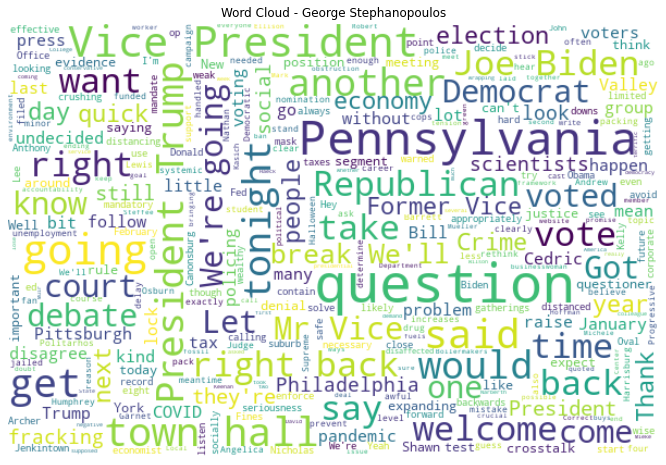

In [13]:
wordcloud = WordCloud(stopwords=my_stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      background_color="white"
                      ).generate(text_GS)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - George Stephanopoulos')
plt.show()

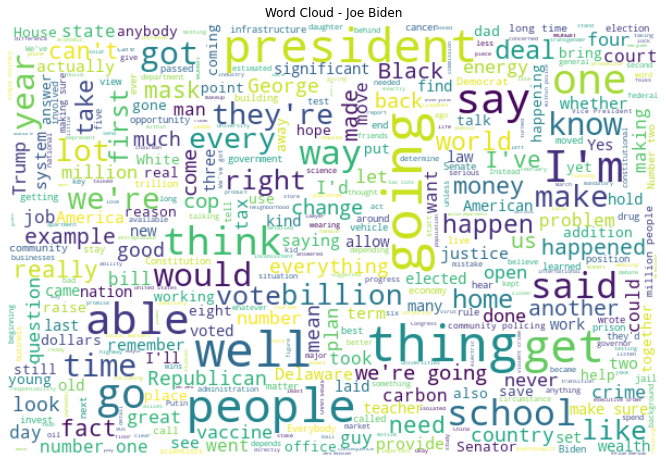

In [14]:
wordcloud = WordCloud(stopwords=my_stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      background_color="white").generate(text_JB)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - Joe Biden')
plt.show()

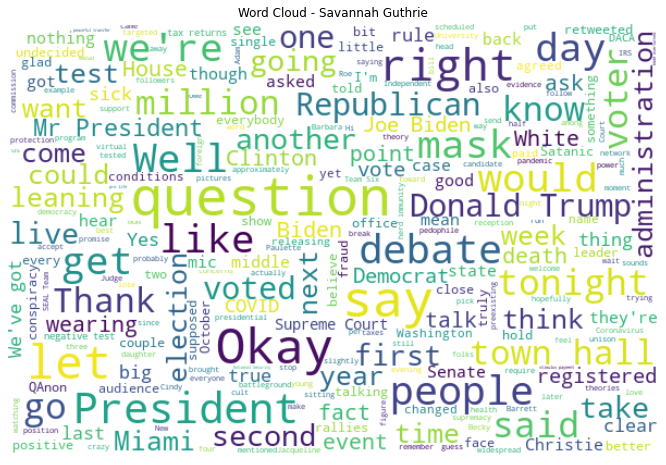

In [15]:
wordcloud = WordCloud(stopwords=my_stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      background_color="white").generate(text_SG)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - Savannah Guthrie')
plt.show()

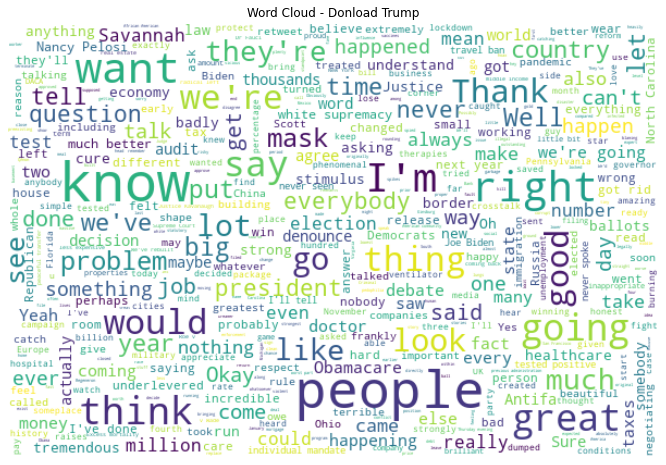

In [16]:
wordcloud = WordCloud(stopwords=my_stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      background_color="white").generate(text_DT)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - Donload Trump')

plt.show()

## Data processing

In [17]:
# lower case
text_F_THB = full_TextJ.lower()
text_F_THT = full_TextT.lower()
text_GS = text_GS.lower()
text_JB = text_JB.lower()
text_SG = text_SG.lower()
text_DT = text_DT.lower()

# tokenize text
words_F_THB = nltk.word_tokenize(text_F_THB)
words_F_THT = nltk.word_tokenize(text_F_THT)
words_GS = nltk.word_tokenize(text_GS)
words_JB = nltk.word_tokenize(text_JB)
words_SG = nltk.word_tokenize(text_SG)
words_DT = nltk.word_tokenize(text_DT)

# remove single characters
words_F_THB = [word for word in words_F_THB if len(word) > 1]
words_F_THT = [word for word in words_F_THT if len(word) > 1]
words_GS = [word for word in words_GS if len(word) > 1]
words_JB = [word for word in words_JB if len(word) > 1]
words_SG = [word for word in words_SG if len(word) > 1]
words_SG = [word for word in words_SG if word not in my_stopwords]
words_DT = [word for word in words_DT if len(word) > 1]

# remove stopwords
words_F_THB = [word for word in words_F_THB if word not in my_stopwords]
words_F_THT = [word for word in words_F_THT if word not in my_stopwords]
words_GS = [word for word in words_GS if word not in my_stopwords]
words_JB = [word for word in words_JB if word not in my_stopwords]
words_DT = [word for word in words_DT if word not in my_stopwords]


wordDictJB = dict.fromkeys(words_F_THB, 0)
wordDictDT = dict.fromkeys(words_F_THT, 0)
for word in words_JB:
    wordDictJB[word]+=1
for word in words_DT:
    wordDictDT[word]+=1

## George Stephanopoulos: Word Frequency & Bigrams

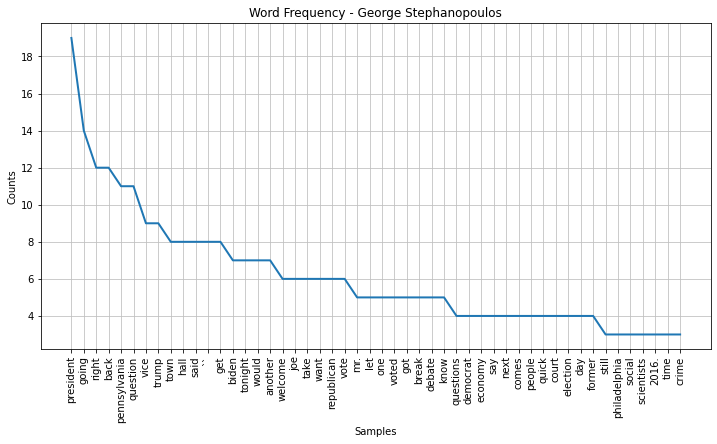

In [18]:
# count word frequencies
word_freqs = nltk.FreqDist(words_GS)
# plot word frequencies
plt.rcParams['figure.figsize'] = [12, 6]
plt.title('Word Frequency - George Stephanopoulos')
word_freqs.plot(50)

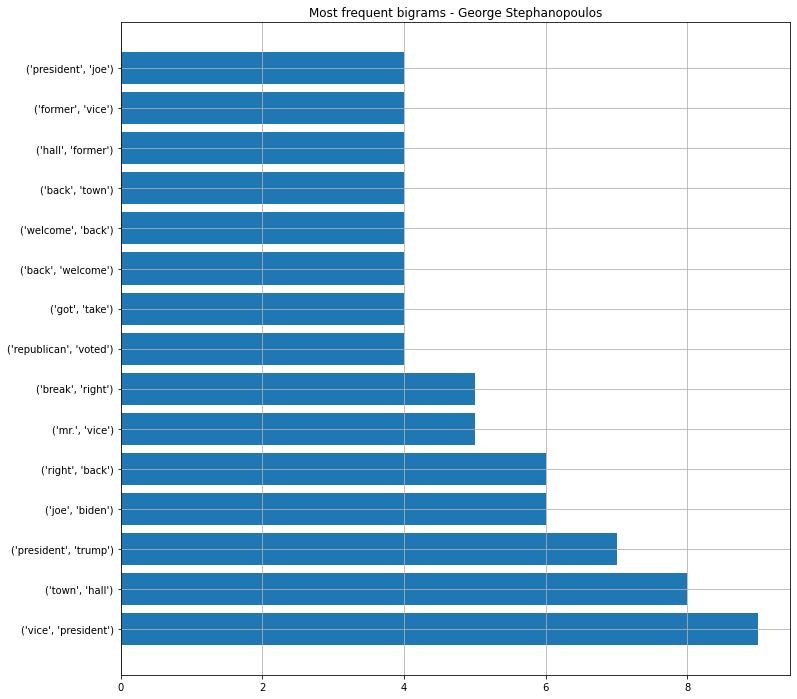

In [19]:
my_bigrams = bigrams(words_GS)
counts = Counter(my_bigrams)
counts = dict(counts)
# convert dictionary to data frame
dcounts = pd.DataFrame.from_dict(counts, orient='index', columns=['frequency'])
# select only bigrams occuring at least four times
dcounts = dcounts[dcounts.frequency>=4]
# and sort descending
dcounts = dcounts.sort_values(by='frequency', ascending=False)
plt.rcParams['figure.figsize'] = [12, 12]
plt.barh(list(map(str, dcounts.index)), dcounts.frequency)
plt.title('Most frequent bigrams - George Stephanopoulos')
plt.grid()
plt.show()

## Joe Biden: Word Frequency & Bigrams

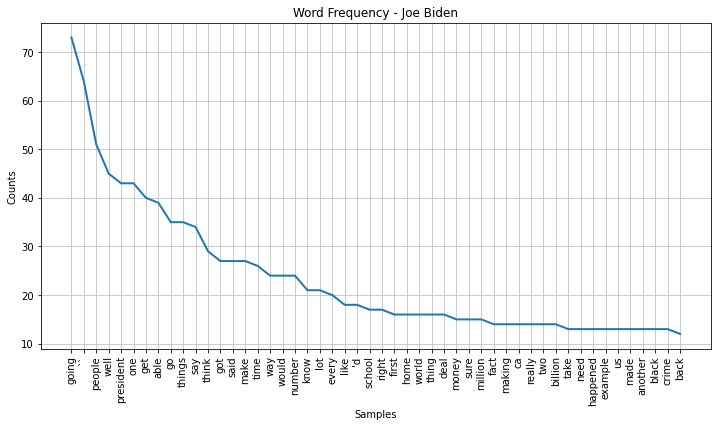

In [20]:
# count word frequencies
word_freqs = nltk.FreqDist(words_JB)
# plot word frequencies
plt.rcParams['figure.figsize'] = [12, 6]
plt.title('Word Frequency - Joe Biden')
word_freqs.plot(50)

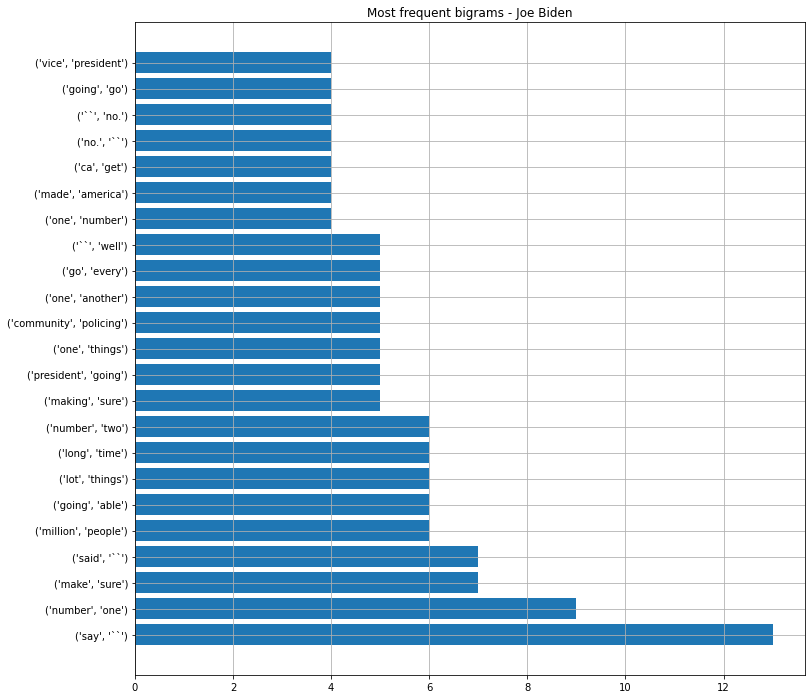

In [21]:
my_bigrams = bigrams(words_JB)
counts = Counter(my_bigrams)
counts = dict(counts)
# convert dictionary to data frame
dcounts = pd.DataFrame.from_dict(counts, orient='index', columns=['frequency'])
# select only bigrams occuring at least four times
dcounts = dcounts[dcounts.frequency>=4]
# and sort descending
dcounts = dcounts.sort_values(by='frequency', ascending=False)
plt.rcParams['figure.figsize'] = [12, 12]
plt.barh(list(map(str, dcounts.index)), dcounts.frequency)
plt.title('Most frequent bigrams - Joe Biden')
plt.grid()
plt.show()

## Savannah Guthrie: Word Frequency & Bigrams

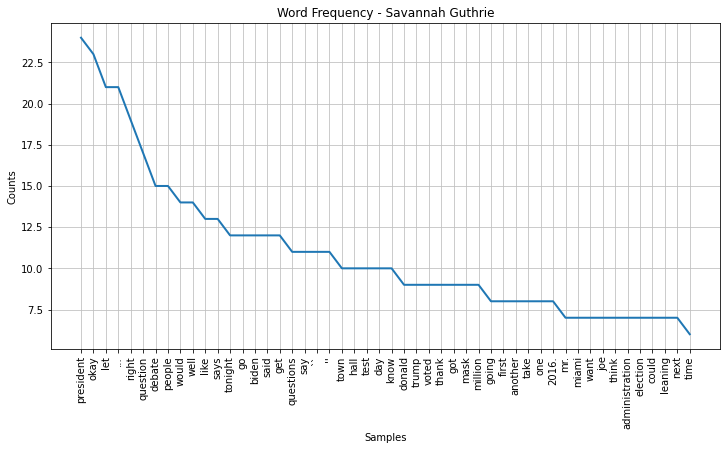

In [22]:
# count word frequencies
word_freqs = nltk.FreqDist(words_SG)
# plot word frequencies
plt.rcParams['figure.figsize'] = [12, 6]
plt.title('Word Frequency - Savannah Guthrie')
word_freqs.plot(50)

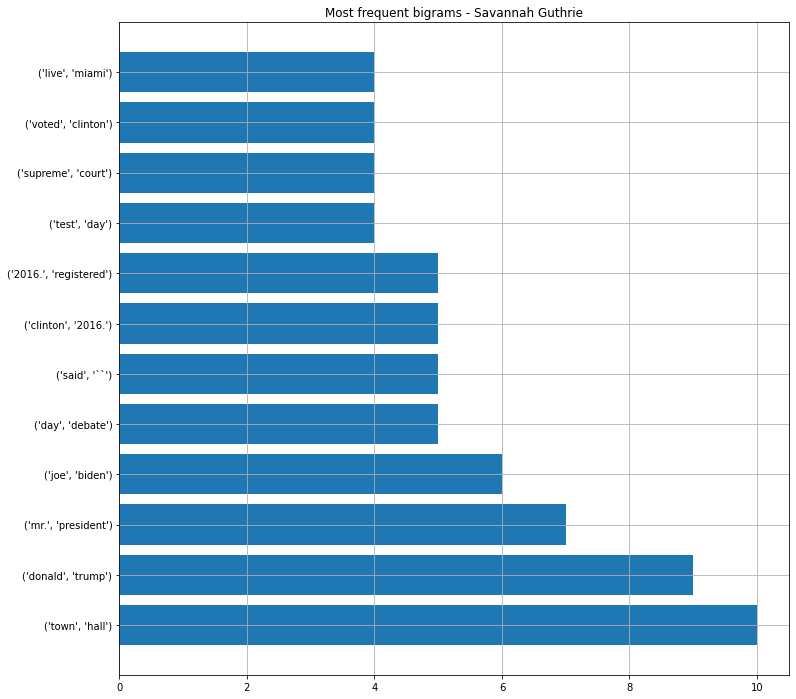

In [23]:
my_bigrams = bigrams(words_SG)
counts = Counter(my_bigrams)
counts = dict(counts)
# convert dictionary to data frame
dcounts = pd.DataFrame.from_dict(counts, orient='index', columns=['frequency'])
# select only bigrams occuring at least four times
dcounts = dcounts[dcounts.frequency>=4]
# and sort descending
dcounts = dcounts.sort_values(by='frequency', ascending=False)
plt.rcParams['figure.figsize'] = [12, 12]
plt.barh(list(map(str, dcounts.index)), dcounts.frequency)
plt.title('Most frequent bigrams - Savannah Guthrie')
plt.grid()
plt.show()

## Donald Trump: Word Frequency & Bigrams

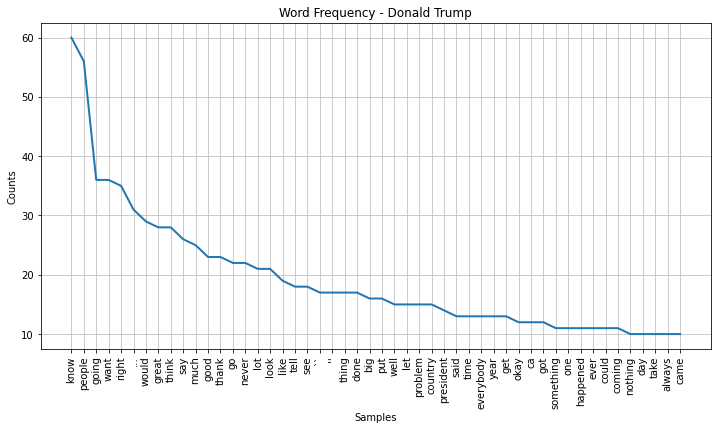

In [24]:
# count word frequencies
word_freqs = nltk.FreqDist(words_DT)
# plot word frequencies
plt.rcParams['figure.figsize'] = [12, 6]
plt.title('Word Frequency - Donald Trump')
word_freqs.plot(50)

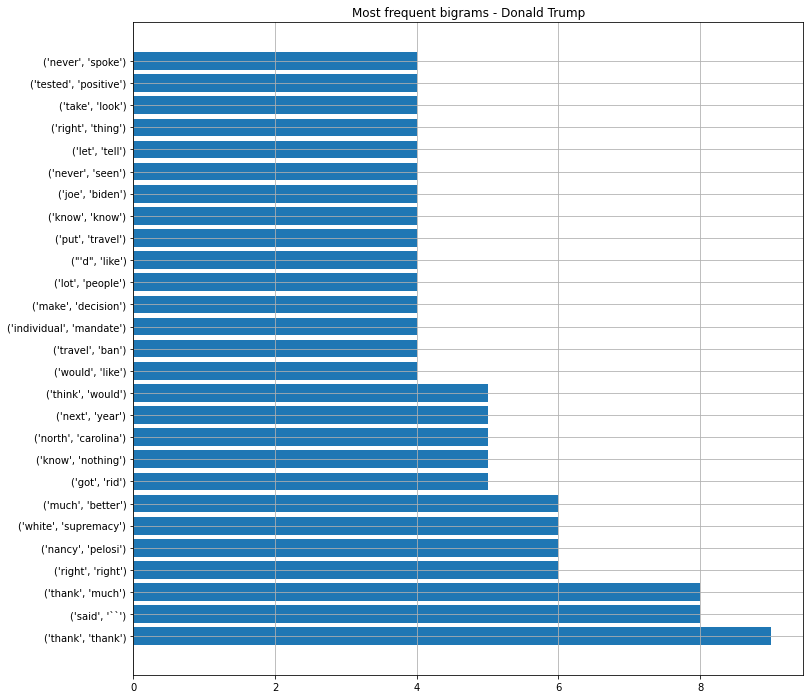

In [25]:
my_bigrams = bigrams(words_DT)
counts = Counter(my_bigrams)
counts = dict(counts)
# convert dictionary to data frame
dcounts = pd.DataFrame.from_dict(counts, orient='index', columns=['frequency'])
# select only bigrams occuring at least four times
dcounts = dcounts[dcounts.frequency>=4]
# and sort descending
dcounts = dcounts.sort_values(by='frequency', ascending=False)
plt.rcParams['figure.figsize'] = [12, 12]
plt.barh(list(map(str, dcounts.index)), dcounts.frequency)
plt.title('Most frequent bigrams - Donald Trump')
plt.grid()
plt.show()

## Heat Map

In [26]:
# making the time consecutive

df_Biden['seconds'] = 0 # we assume we start from 0
                  # and then add the values accordingly

for i, tm in enumerate(df_Biden.minute[1:],1):
    timeParts = [int(s) for s in str(tm).split(':')]
    
    # when we have hour like 01:10:50
    if (len(timeParts)>2) and (i<len(df_Biden)):
        
        current = (timeParts[0] * 60 + timeParts[1]) * 60 + timeParts[2]
        difference = current - df_Biden.loc[i-1, 'seconds']
        df_Biden.loc[i, 'seconds'] = df_Biden.loc[i-1, 'seconds'] + difference

# Second Townhall

df_Trump['seconds'] = 0 

for i, tm in enumerate(df_Trump.minute[1:],1):
    timeParts = [int(s) for s in str(tm).split(':')]
    
    # when we have hour like 01:10:50
    if (len(timeParts)>2) and (i<len(df_Trump)):
        
        current = (timeParts[0] * 60 + timeParts[1]) * 60 + timeParts[2]
        difference = current - df_Trump.loc[i-1, 'seconds']
        df_Trump.loc[i, 'seconds'] = df_Trump.loc[i-1, 'seconds'] + difference

df_Biden['minutes'] = df_Biden.seconds.apply(lambda x:x//60)
df_Trump['minutes'] = df_Trump.seconds.apply(lambda x:x//60)

# We use this format of %h:%m:%s by using the following command
df_Biden['time'] = df_Biden.seconds.apply(lambda x:str(datetime.timedelta(seconds=x)))
df_Trump['time'] = df_Trump.seconds.apply(lambda x:str(datetime.timedelta(seconds=x)))

In [27]:
df_Trump[0:10]

speaker    minute  \
0  Savannah Guthrie  00:03:50   
1         Speaker 1  00:04:35   
2  Savannah Guthrie  00:04:40   
3      Donald Trump  00:04:48   
4  Savannah Guthrie  00:04:51   
5      Donald Trump  00:05:00   
6  Savannah Guthrie  00:05:06   
7      Donald Trump  00:05:10   
8         Speaker 1  00:05:16   
9  Savannah Guthrie  00:05:28   

                                                text  seconds  minutes  \
0  It's nothing but noise. What? Okay. All right,...        0        0   
1  This is an NBC news special presentation of To...      275        4   
2  Tonight, Donald Trump in the arena. His first ...      280        4   
3  I'm feeling great, I don't know about you. How...      288        4   
4  With tonight's debate canceled, the President ...      291        4   
5  It's great to be back in my home state, Florid...      300        5   
6  With just 19 days to go, the President makes h...      306        5   
7  My goal is to fight for you and fight for your...      310        5   
8  From NBC News, Decision 2020, Donald Trump Tow...      316        5   
9  Hi everybody, and good evening. It's good to h...      328        5   

      time  
0  0:00:00  
1  0:04:35  
2  0:04:40  
3  0:04:48  
4  0:04:51  
5  0:05:00  
6  0:05:06  
7  0:05:10  
8  0:05:16  
9  0:05:28

In [28]:
df_Biden = df_Biden[df_Biden['speaker'].isin(["George Stephanopoulos", "Joe Biden"])]
df_Trump = df_Trump[df_Trump['speaker'].isin(["Savannah Guthrie", "Donald Trump"])]

In [29]:
heat = df_Biden.groupby(['minutes', 'speaker']).count().reset_index()
fig = go.Figure(data=go.Heatmap(
                z=heat.minute,
                x=heat.minutes,
                y=heat.speaker,
                colorscale='Viridis_r',
                colorbar=dict(
                title="Heat of the discussion",
                titleside="top",
                tickmode="array",
                tickvals=[1, 4, 10],
                ticktext=["very cool", "normal", "Hot!"],
                ticks="outside"
    )
        ))

fig.update_layout(title='Joe Biden Town Hall: # of times each one talks in each minute',
                 xaxis_nticks=36)


fig.show()

In [30]:
heat = df_Trump.groupby(['minutes', 'speaker']).count().reset_index()
fig = go.Figure(data=go.Heatmap(
                z=heat.minute,
                x=heat.minutes,
                y=heat.speaker,
                colorscale='Viridis_r',
                colorbar=dict(
                title="Heat of the discussion",
                titleside="top",
                tickmode="array",
                tickvals=[1, 4, 10],
                ticktext=["very cool", "normal", "Hot!"],
                ticks="outside"
    )
        ))
fig.update_xaxes(range=[0, 64])
fig.update_layout(title='Donald Trump Town Hall: # of times each one talks in each minute',
                 xaxis_nticks=36)


fig.show()

## Sentiment Analysis

In [31]:
sia = SentimentIntensityAnalyzer()   

In [32]:
sent = sia.polarity_scores(text_GS)
sent_val = sent['compound']
sent.pop('compound')
print('George Stephanopoulos: sentiment score = ', sent_val)
print('George Stephanopoulos: split = ', sent)


George Stephanopoulos: sentiment score =  0.9864
George Stephanopoulos: split =  {'neg': 0.063, 'neu': 0.849, 'pos': 0.089}


In [33]:
sent = sia.polarity_scores(text_JB)
sent_val = sent['compound']
sent.pop('compound')
print('Joe Biden  : sentiment score = ', sent_val)
print('Joe Biden  : split = ', sent)

Joe Biden  : sentiment score =  0.9999
Joe Biden  : split =  {'neg': 0.063, 'neu': 0.824, 'pos': 0.113}


In [34]:
sent = sia.polarity_scores(text_SG)
sent_val = sent['compound']
sent.pop('compound')
print('Savannah Guthrie: sentiment score = ', sent_val)
print('Savannah Guthrie: split = ', sent)

Savannah Guthrie: sentiment score =  0.9997
Savannah Guthrie: split =  {'neg': 0.066, 'neu': 0.805, 'pos': 0.129}


In [35]:
sent = sia.polarity_scores(text_DT)
sent_val = sent['compound']
sent.pop('compound')
print('Donald Trump: sentiment score = ', sent_val)
print('Donald Trump: split = ', sent)

Donald Trump: sentiment score =  1.0
Donald Trump: split =  {'neg': 0.083, 'neu': 0.755, 'pos': 0.162}
